In [1]:
import os
from pathlib import Path
import math

#Add in the path to the directory that contains the backmapped atomistic files
directory = os.fsencode("../A2A_TM5TM5_martini_EN_atomistic_files")
data_folder = Path("../A2A_TM5TM5_martini_EN_atomistic_files")

distances={} # Dictionary of distances on their own for each residues pair and each file
distance_cutoff={} # Dictionary of distance pairs with residue names <10 A for each file

# Helix A refers to the first transmembrane helix listed in the gro file
# Helix B refers to the second transmember helix listed in the gro file

# Create a for loop to go through all the files in the directory and open the files you are interested in

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    file_to_open = data_folder / filename
    #print(filename) # Ensure that all files are being read.
    
    # If the file contains the helix pair you are interested in, then open it.
    
    if filename.startswith("TM5TM5"):
        file_to_open = data_folder / filename
        f = open(file_to_open)
        all_lines_variable=f.readlines()
        f.close()
        
        TM_helix_A_residues=[] # Lists the residue number and 3 letter amino acid code
        TM_helix_A_residue_lines=[] # Lists the line of each residue in the gro file 
        
        # We are interested in backbone-backbone distance between the helix pairs, 
        # so you only want to append the lines that contain 'CA' as these lines contain 
        # the coordinates to calculate the distances
        
        #NEED TO EDIT THE LINES THAT THE FILE READS FOR EACH HELIX COMBINATION
        for line in all_lines_variable[3:426]:
            if 'CA' in line:
                TM_helix_A_residues.append(line[2:8])
                TM_helix_A_residue_lines.append(line)
            TM_helix_B_residues=[] # Lists the residue number and 3 letter amino acid code
            TM_helix_B_residue_lines=[] # Lists the line of each residue in the gro file 
            for line in all_lines_variable[427:850]:
                if 'CA' in line:
                    TM_helix_B_residues.append(line[2:8])
                    TM_helix_B_residue_lines.append(line)
        
        # Append the distances of each coordindate to variables for both helices
        
        # Assign the coordinate valuues to variables 
        
        for TM_helix_A_residue_line in TM_helix_A_residue_lines:
            x1=float(TM_helix_A_residue_line[22:28])
            y1=float(TM_helix_A_residue_line[30:36])
            z1=float(TM_helix_A_residue_line[38:44])
            
            for TM_helix_B_residue_line in TM_helix_B_residue_lines:
                x2=float(TM_helix_B_residue_line[22:28])
                y2=float(TM_helix_B_residue_line[30:36])
                z2=float(TM_helix_B_residue_line[38:44])
                
                # Calculate the distances between all helix residues
            
                if TM_helix_A_residue_line != TM_helix_B_residue_line:
                    
                    d = math.sqrt(math.pow(x2 - x1, 2) +
                    math.pow(y2 - y1, 2) +
                    math.pow(z2 - z1, 2)* 1.0)
                    dist_angstroms=d*10
                    
                    # Variable line prints the residue pair and distance between them.
                    res_dist=[TM_helix_A_residue_line[2:8],TM_helix_B_residue_line[2:8],dist_angstroms]
        
                    # If the file name already exists in the dictionary then append the residue distance between
                    # pair of helix residues. If not create a new dictionary entry.
                          
                    if filename in distances.keys():
                        distances[filename].append(res_dist)
                    else:
                        distances[filename] = [res_dist]
                    
                    # If the distance between the residues is less than the cutoff of 10A then append to
                    # the dictionary that stores residue pairs with distances less than the cutoff.
                    
                    if dist_angstroms < 10:
                        if filename in distance_cutoff.keys():
                            distance_cutoff[filename].append(res_dist)
                        else:
                            distance_cutoff[filename] = [res_dist]
                        
#print(distances)
#print(len(distances))
#print(distance_cutoff)
print("There are", len(distance_cutoff), "dimerised replicas")
#print(len(TM_helix_A_residues))
#print(len(TM_helix_B_residues))

There are 7 dimerised replicas


In [2]:
import pandas as pd

# Creates a dataframe of all atomistic files and the residue pair distances 

dict_distances = pd.DataFrame({ key:pd.Series(value) for key, value in distances.items() })
dict_distances

#Save as an excel spreadsheet for analysis - lists all files and the associated residue pairs and distances
#dict_distances.to_excel("dict_distances.xlsx") 

,TM5TM5_atomistic_1.gro,TM5TM5_atomistic_10.gro,TM5TM5_atomistic_11.gro,TM5TM5_atomistic_12.gro,TM5TM5_atomistic_13.gro,TM5TM5_atomistic_14.gro,TM5TM5_atomistic_15.gro,TM5TM5_atomistic_16.gro,TM5TM5_atomistic_17.gro,TM5TM5_atomistic_18.gro,...,TM5TM5_atomistic_46.gro,TM5TM5_atomistic_47.gro,TM5TM5_atomistic_48.gro,TM5TM5_atomistic_49.gro,TM5TM5_atomistic_5.gro,TM5TM5_atomistic_50.gro,TM5TM5_atomistic_6.gro,TM5TM5_atomistic_7.gro,TM5TM5_atomistic_8.gro,TM5TM5_atomistic_9.gro
0,"[183MET, 183MET, 19.36352757118392]","[183MET, 183MET, 39.01469466752239]","[183MET, 183MET, 46.94087664285788]","[183MET, 183MET, 46.81910400680475]","[183MET, 183MET, 54.68667479377403]","[183MET, 183MET, 45.31189468561208]","[183MET, 183MET, 37.59537338556434]","[183MET, 183MET, 37.37556822310532]","[183MET, 183MET, 54.60831713209995]","[183MET, 183MET, 18.12791769619445]",...,"[183MET, 183MET, 45.40841992406254]","[183MET, 183MET, 45.68990369873852]","[183MET, 183MET, 42.15608497002538]","[183MET, 183MET, 19.6006453975373]","[183MET, 183MET, 34.3031572890893]","[183MET, 183MET, 29.517564262655547]","[183MET, 183MET, 33.28023587656795]","[183MET, 183MET, 48.54498635286656]","[183MET, 183MET, 43.77743025806791]","[183MET, 183MET, 29.81995808179481]"
1,"[183MET, 184ASN, 16.7753420233389]","[183MET, 184ASN, 37.30798976090779]","[183MET, 184ASN, 43.32703774780824]","[183MET, 184ASN, 46.578402720574275]","[183MET, 184ASN, 53.30557475536682]","[183MET, 184ASN, 41.644567472840926]","[183MET, 184ASN, 39.567589009187806]","[183MET, 184ASN, 34.62295481324493]","[183MET, 184ASN, 53.7563726454827]","[183MET, 184ASN, 14.5968661020097]",...,"[183MET, 184ASN, 48.712977736943984]","[183MET, 184ASN, 42.06338550330916]","[183MET, 184ASN, 39.30575784792858]","[183MET, 184ASN, 19.771193691833588]","[183MET, 184ASN, 32.41363447686791]","[183MET, 184ASN, 26.091705578593363]","[183MET, 184ASN, 32.520192188854]","[183MET, 184ASN, 47.281100875508386]","[183MET, 184ASN, 42.071902738050724]","[183MET, 184ASN, 26.212672507777608]"
2,"[183MET, 185TYR, 19.468376922589105]","[183MET, 185TYR, 39.0276081767766]","[183MET, 185TYR, 43.08449140932268]","[183MET, 185TYR, 43.2560111429614]","[183MET, 185TYR, 55.60140825554691]","[183MET, 185TYR, 39.39687931803737]","[183MET, 185TYR, 42.9740537999384]","[183MET, 185TYR, 32.23003878371853]","[183MET, 185TYR, 50.54036505606187]","[183MET, 185TYR, 14.553717738090153]",...,"[183MET, 185TYR, 51.702690452238556]","[183MET, 185TYR, 40.26167656717738]","[183MET, 185TYR, 36.25829698151859]","[183MET, 185TYR, 17.245558848584757]","[183MET, 185TYR, 30.235899192846905]","[183MET, 185TYR, 23.771379850568202]","[183MET, 185TYR, 34.99233773270943]","[183MET, 185TYR, 44.526105825683885]","[183MET, 185TYR, 38.38322159485834]","[183MET, 185TYR, 25.681014388064973]"
3,"[183MET, 186MET, 21.288945488210544]","[183MET, 186MET, 42.123396111899616]","[183MET, 186MET, 46.583855572504945]","[183MET, 186MET, 43.21733911290699]","[183MET, 186MET, 58.46176955925983]","[183MET, 186MET, 42.05094529258528]","[183MET, 186MET, 42.54099787264046]","[183MET, 186MET, 34.748315067064766]","[183MET, 186MET, 48.3807761409426]","[183MET, 186MET, 16.27770868396409]",...,"[183MET, 186MET, 51.109930541921116]","[183MET, 186MET, 43.36749589266135]","[183MET, 186MET, 38.45423383712124]","[183MET, 186MET, 17.461511962026663]","[183MET, 186MET, 33.39007038027923]","[183MET, 186MET, 26.56492424231622]","[183MET, 186MET, 34.531668074392236]","[183MET, 186MET, 46.28959818360924]","[183MET, 186MET, 38.68708311568604]","[183MET, 186MET, 27.289338577547092]"
4,"[183MET, 187VAL, 19.2799014520303]","[183MET, 187VAL, 40.5695760391947]","[183MET, 187VAL, 46.6371611485948]","[183MET, 187VAL, 46.577374335614934]","[183MET, 187VAL, 56.74677611988191]","[183MET, 187VAL, 42.89734490618272]","[183MET, 187VAL, 39.80192332036229]","[183MET, 187VAL, 36.27907110166963]","[183MET, 187VAL, 51.096643725395516]","[183MET, 187VAL, 14.744236161971902]",...,"[183MET, 187VAL, 49.28378739504503]","[183MET, 187VAL, 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

#CREATING A HEATMAP FOR ALL REPLICAS WHICH DIMERIZE
df_mean=0
df_total=0
df_overall=0
# distance_cutoff is the dictionary containing all files and distances below the cutoff
for key, value in distance_cutoff.items():
    
    # Creates a dataframe for each file (key) with residue pairs below 10Angstrom
    df = pd.DataFrame({key:pd.Series(value)})
    #display(df) 
    
    # Creates a dataframe for all file with all residue pairs
    dict_distance_cutoff = pd.DataFrame({ key:pd.Series(value) for key, value in distance_cutoff.items() })
    #display(dict_distance_cutoff)
    
    #Creates a dataframe for invididual files with all residue pairs
    df = pd.DataFrame(dict_distances[key])
    #display(df)
    
    # Data values refer to the distances between the helix pairs
    data_values=[]
    
    # Appending the distances
    for value in dict_distances[key]:
        data_values.append(value[2])
        
    #print(data_values)
    
    # Separating every 25 distances into individual lists for each residue
    
    # THIS NEEDS TO BE CHANGED DEPENDING ON HOW MANY RESIDUES IN EACH HELIX B
    coord_list_split = [data_values[x:x+25] for x in range(0, len(data_values), 25)]
    
    df = pd.DataFrame(coord_list_split, index=TM_helix_A_residues, columns=TM_helix_B_residues)
    #display(df)
    
    # This adds all the distances together so a mean can be calculated.
    df_overall=df_overall+df

    # CONSTRUCTING THE HEATMAP USING SEABORN
    sns.set(style="white")

    # Set the figure up
    f, ax = plt.subplots(figsize=(60, 30))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Construct the heatmap, set minimum and maximum values
    sns.heatmap(df, cmap=cmap,  center=0, vmax=10.0, vmin=0.0, square=True, linewidths=0.5)
    
    # Construct matplotlib.colorbar.Colorbar object and format
    cbar = ax.collections[0].colorbar
    cbar.ax.set_yticklabels(['> 10','2','4','6', '8', '10'], fontweight='bold')
    cbar.set_label('Distance (Å)', fontsize=60, fontweight='bold')
    cbar.ax.tick_params(labelsize=40)

    # Set titles and axis labels and formatting
    ax.set_title(key, fontweight='bold', fontsize=60,pad=30)
    ax.set_xlabel('TM5', fontweight='bold', fontsize=60,labelpad=20)
    ax.set_ylabel('TM5', fontweight='bold', fontsize=60,labelpad=20)
    ax.invert_yaxis()
    
    ax.set_xticklabels(
        ax.get_xticklabels(), 
        rotation=90, 
        horizontalalignment='right',
        fontweight='bold',
        fontsize=40)

    ax.set_yticklabels(
        ax.get_yticklabels(),  
        horizontalalignment='right',
        rotation=0,
        fontweight='bold',
        fontsize=40)
    
    ax.axhline(y=0, color='k',linewidth=10)
    ax.axhline(y=df.shape[1], color='k',linewidth=10)
    ax.axvline(x=0, color='k',linewidth=10)
    ax.axvline(x=df.shape[0], color='k',linewidth=10)
   
    f.patch.set_alpha(0)
    plt.savefig(key[0:19],facecolor=f.get_alpha())
    plt.show()
    
    # Saving the dataframe to excel 
    #df.to_excel(key[0:20]+'.xlsx')
    
    # The code below is used to calculate the number of times a 
    # paritcular residue pair interaction occurs in the ensemble
    
    # This is used to create a dataframe to calculate the mean
    df_mean = df_mean+df
    
    # If you change all values to 1, then you can add all the dataframes together (df_total). 
    df[df > 0] = 1
    
    df_total=df_total+df



<Figure size 6000x3000 with 2 Axes>

<Figure size 6000x3000 with 2 Axes>

<Figure size 6000x3000 with 2 Axes>

<Figure size 6000x3000 with 2 Axes>

<Figure size 6000x3000 with 2 Axes>

<Figure size 6000x3000 with 2 Axes>

<Figure size 6000x3000 with 2 Axes>

In [4]:
# This prints the combined distance of all replicas.
#print(df_overall)

In [5]:
# This tells you the number of times a residue pair interaction occured in an ensemble
#print(df_total)

In [6]:
#This calculates the mean
mean=df_overall.div(df_total)
mean = pd.DataFrame(data=mean)
mean

,183MET,184ASN,185TYR,186MET,187VAL,188TYR,189PHE,190ASN,191PHE,192PHE,...,198PRO,199LEU,200LEU,201LEU,202MET,203LEU,204GLY,205VAL,206TYR,207LEU
183MET,18.191209,17.390204,15.720532,16.147681,17.989434,18.281341,17.365620,16.411156,17.847297,19.727143,...,23.554827,23.558851,25.344076,27.240291,27.581026,28.377462,30.331339,32.144038,33.316920,33.435181
184ASN,16.052402,15.283392,13.750306,14.056656,15.755537,16.083309,15.435418,14.515309,15.824643,17.615566,...,21.818941,21.846331,23.526753,25.467415,25.976126,26.755554,28.631941,30.518300,31.781576,31.971697
185TYR,15.844150,14.889592,13.316175,13.511249,14.943520,15.215423,14.654278,13.652091,14.861061,16.477368,...,20.451890,20.549418,22.145915,23.970227,24.540852,25.369742,27.134017,28.960532,30.245413,30.535461
186MET,18.112352,17.006829,15.041077,15.050165,16.340960,16.431071,15.510953,14.254441,15.324060,16.861034,...,19.675713,19.640374,21.332594,23.038784,23.358139,24.165152,26.013062,27.723141,28.863818,29.083484
187VAL,18.300686,17.405917,15.241372,14.861756,16.162944,16.371034,15.423168,13.907305,14.615492,16.198266,...,18.580167,18.302451,19.967212,21.792281,22.028747,22.667458,24.600008,26.400740,27.497941,27.554724
188TYR,16.309784,15.645026,13.569201,12.923315,14.127868,14.498022,13.866764,12.328937,12.801830,14.303883,...,17.269239,16.970285,18.494454,20.462046,20.925561,21.495578,23.349425,25.313547,26.547546,26.639552
189PHE,15.058563,14.290096,12.433315,11.789099,12.681916,13.126726,12.835718,11.348615,11.760002,13.218425,...,16.795833,16.585810,17.974114,19.930546,20.572415,21.183407,22.901663,24.868496,26.168040,26.398150
190ASN,16.899433,15.827151,13.884933,13.296665,13.907490,14.103580,13.464952,11.912692,12.360408,13.635924,...,16.338804,16.187591,17.608086,19.348630,19.884725,20.575417,22.245016,24.051468,25.279094,25.560585
191PHE,18.970406,17.951936,15.736989,14.936171,15.527975,15.650599,14.786755,13.040708,13.149282,14.280141,...,15.639673,15.164794,16.599081,18.308577,18.574017,19.090413,20.880050,22.659132,23.725161,23.814584
192PHE,18.918252,18.174600,15.892564,14.692916,15.235156,15.550825,14.788221,12.855230,12.504352,13.527689,...,14.476858,13.719498,14.995102,16.807624,17.116262,17.419163,19.233353,21.152812,22.248532,22.219416


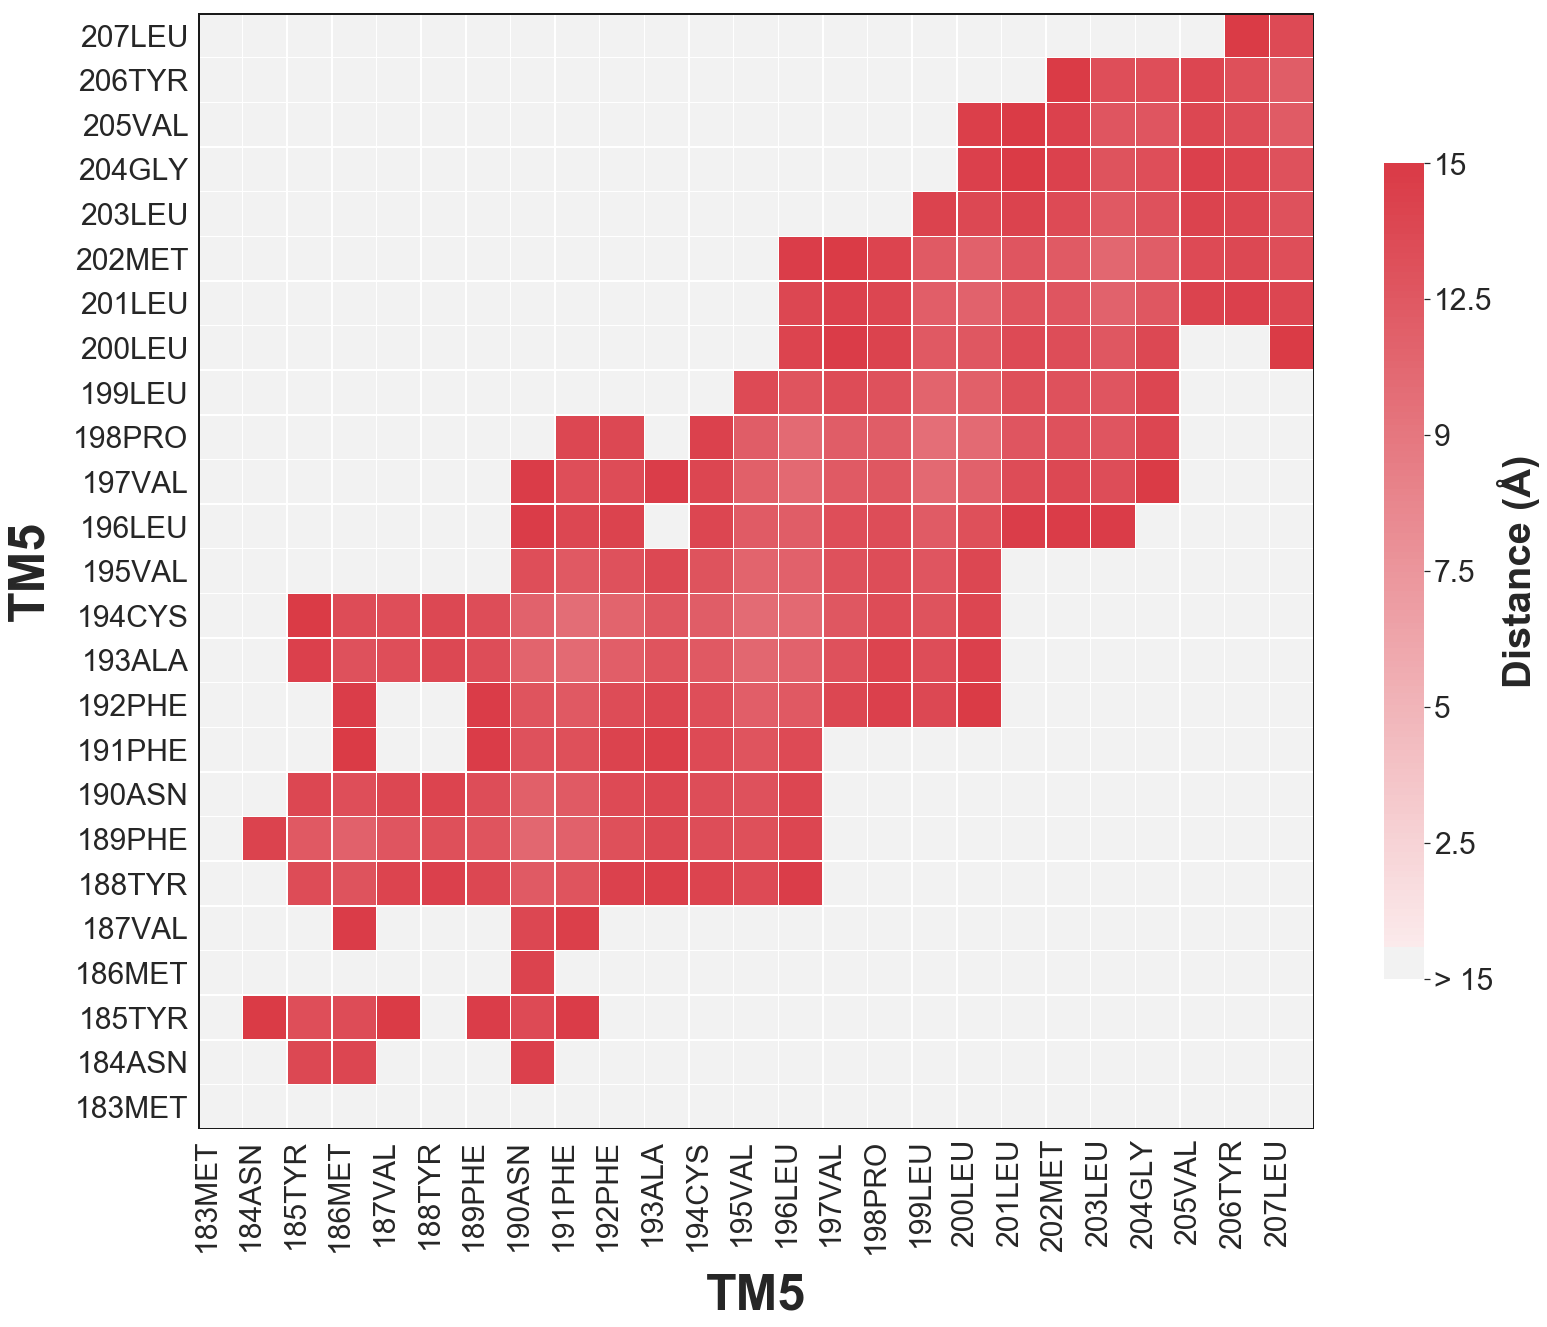

In [7]:
# HEATMAP: Mean distance in all dimerized replicas 

sns.set(style="white")
mean[mean > 15] = 0

# Set the figure up
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Construct the heatmap, set minimum and maximum values
sns.heatmap(mean, cmap=cmap,  center=0, vmax=15.0, vmin=0.0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.6})

# Construct matplotlib.colorbar.Colorbar object and format
cbar = ax.collections[0].colorbar
cbar.ax.set_yticklabels(['> 15','2.5','5','7.5', '9', '12.5', '15'])
cbar.set_label('Distance (Å)', fontsize=40, fontweight='bold')
cbar.ax.tick_params(labelsize=30)

# Set titles and axis labels and formatting
ax.set_xlabel('TM5', fontweight='bold', fontsize=50,labelpad=20)
ax.set_ylabel('TM5', fontweight='bold', fontsize=50,labelpad=20)
ax.invert_yaxis()

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontsize=30)

ax.set_yticklabels(
    ax.get_yticklabels(),  
    horizontalalignment='right',
    rotation=0,
    fontsize=30)

ax.axhline(y=0, color='k',linewidth=3)
ax.axhline(y=df.shape[1], color='k',linewidth=3)
ax.axvline(x=0, color='k',linewidth=3)
ax.axvline(x=df.shape[0], color='k',linewidth=3)
plt.savefig('A2A_TM5TM5_mean',facecolor=f.get_alpha())